#### 1.A Jupyter Notebook demonstrating the steps that you performed in the exploration of the dataset 

#### 2. A write-up of the insights from data exploration

-Non homogeneous data: several attribute fields are optional on Yelp which means not every business has a value of all fields and answers are not uniform. For example some values are 1 or 0 whereas others are Yes/No 

-Irrelevant information: For the purpose of this study, some fields in the tables will not be relevant. Like non restaurant businesses, some attributes listed on a user’s profile etc. These can be ignored when creating the database 

-Overlaps in categories: Since I want to find trends in scarcity of a particular cuisine/type of restaurant it is necessary to be able to query this information for a particular business. For example: How many Chinese restaurants x km radius from location. However the current business table does not contain a well defined cuisine column and instead has a generic categories column with any cuisine associated with a business that may skew the results. For example “international food” is vague vs “japanese”. This needs to be further sorted and subcategorized 

-Missing values: Some fields that are missing values should be populated appropriately (NULL or 0) to avoid errors when querying 

 #### 3. A write-up explaining how you plan to store the data for optimal query speed and compression of storage files

In [ ]:
-Remove entries from the business table that are not restaurants. This will ensure that only restaurants will be taken into account in the study so that scarcity of other shops does not impact/skew the results 

-Divide business table into smaller tables so that each table focuses on one main category for better organization. So business -> business_details, business_location, attributes, hours_open and categories table. The PK for each of these tables can be fed into the business_details table to make querying more concise 

-For the business_attributes table - change values to boolean to standardize fields. For instance some entries have “Wifi_available = ‘free’ vs “takes_reservations” = ‘True’. Change these all to T/F 

-For hours_open - simplify into categories. Right now, this row reads as: {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'} but will be easier to read if broken up into something like: 
Days_open: M-F
Hour_open: 08:00
Hour_close: 17:00 
That way it will be easier to query hours of operation and look at overlaps/gaps in restaurant operation hours in the same location 

-Simplify categories table - right now each business has a variable length of all possible categories it belongs to which makes some of this data redundant and difficult to sort through. For example: {Local Flavor, Fast Food, Gluten-Free, Pizza, Restaurants} 
The description local flavor and gluten free are qualities of the restaurant as opposed to cuisine of Fast food and pizza 
So need to sort through these entries with tabulate all the cuisines present with an id

-For the users table the ‘yelping_since’ field can be simplified into just the year instead of: “11/17/2008  2:56:20 PM”. This will make it easier to query how long has the user been on yelp

-Change Elite status to boolean value

-The users table also has a number of columns on the aggregate compliments on their profile and reviews: “compliment_profile”, “compliment_cool” etc which seem to only be populated for yelpers with high review counts > 200. Maybe these columns can be simplified to general attribute called “received_compliments” to avoid several rows of 0s in the database 

-In the Review table, the column text needs some work to be processed. Some form of qualitative/word frequency analysis would need to be performed to get a better gist of the review. Need to think some more on how to implement this. 

-Similarly, the Tips contains the same info as the Review but in more detail so the two could be combined 


#### 4. An Entity-Relationship diagram for your data model 

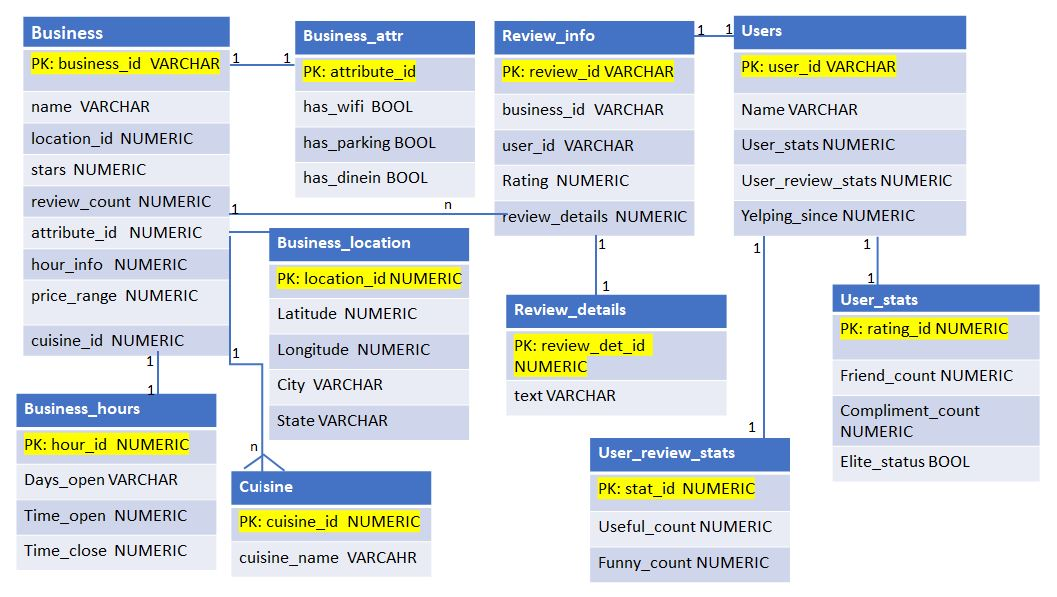